In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Heart Disease.xlsx')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [5]:
df.shape

(319795, 18)

In [6]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()

In [7]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [8]:
df.corr(numeric_only = True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


<Axes: >

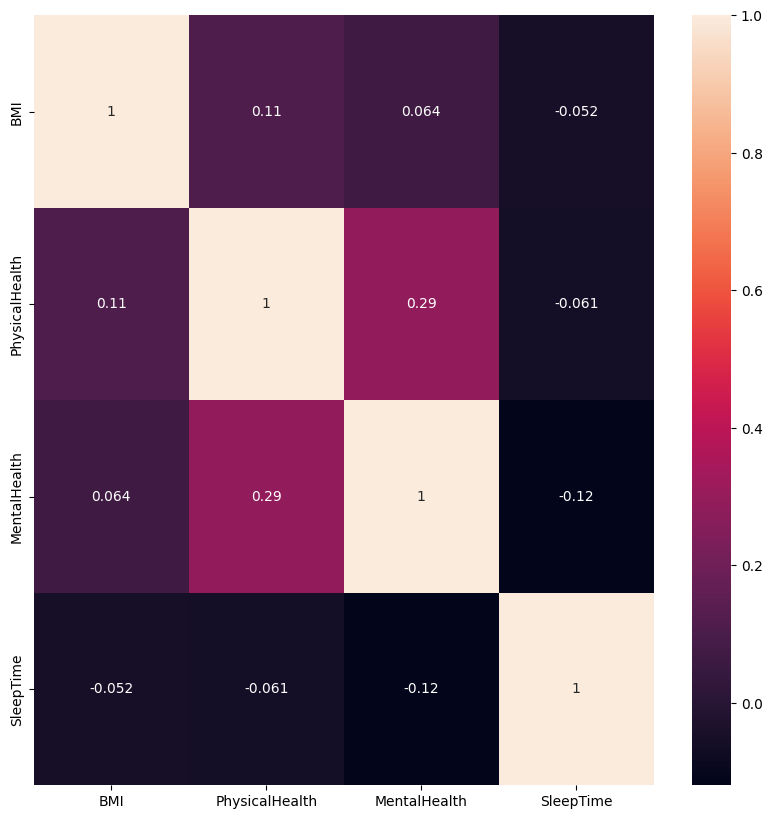

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only = True),annot=True)

In [10]:
df['Diabetic'].value_counts()

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

In [11]:
df['Smoking'].value_counts()

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

In [12]:
df['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

In [13]:
df['Stroke'].value_counts()

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

In [14]:
df['DiffWalking'].value_counts()

DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64

In [15]:
df['PhysicalActivity'].value_counts()

PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64

In [16]:
df['Asthma'].value_counts()

Asthma
No     276923
Yes     42872
Name: count, dtype: int64

In [17]:
df['KidneyDisease'].value_counts()

KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64

In [18]:
df['SkinCancer'].value_counts()

SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64

# Heart Disease has or hasn't

In [19]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [20]:
df['Sex'].value_counts()

Sex
Female    167805
Male      151990
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

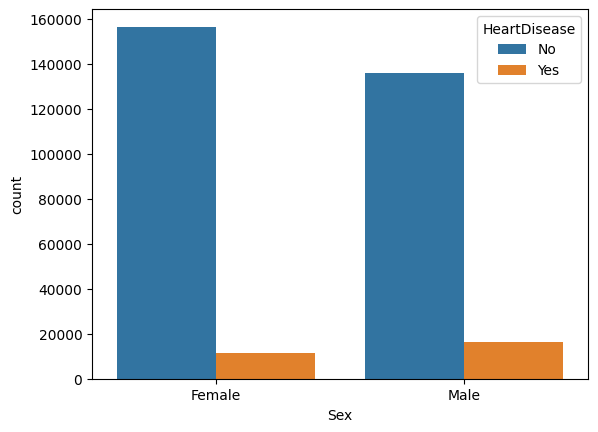

In [21]:
sns.countplot(x='Sex',hue='HeartDisease',data=df)

# Preprocessing the dataset

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [24]:
from pandas.core.dtypes.common import is_numeric_dtype

In [25]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])

In [26]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [27]:
x = df.drop('HeartDisease',axis=1)

In [28]:
x.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [29]:
y= df[['HeartDisease']]

In [30]:
y.head()

,HeartDisease
0,0
1,0
2,0
3,0
4,0


In [31]:
x.shape

(319795, 17)

In [32]:
df['HeartDisease'].value_counts()

HeartDisease
0    292422
1     27373
Name: count, dtype: int64

# Near Miss for under sampling

In [33]:
from imblearn.under_sampling import NearMiss

In [34]:
nm = NearMiss()


In [35]:
new_x, new_y  = nm.fit_resample(x,y)

In [36]:
new_y.value_counts()

HeartDisease
0               27373
1               27373
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split as tts

In [38]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [39]:
xtrain.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
303145,20.51,0,0,0,4,0,0,0,5,5,0,1,0,8,0,0,0
61634,30.82,0,0,0,0,0,0,0,10,4,2,1,4,7,0,1,0
117690,33.91,0,0,0,0,0,0,1,6,5,2,1,2,6,0,0,0
132104,21.59,1,0,0,0,0,0,1,12,5,0,1,4,8,0,0,0
262165,25.75,0,0,0,0,0,0,0,11,5,0,1,4,7,1,0,0


In [40]:
ytrain.head()

,HeartDisease
303145,0
61634,0
117690,0
132104,0
262165,0


In [41]:
xtest.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
271884,27.63,1,0,0,0,25,0,0,1,3,0,1,4,7,0,0,0
270361,21.95,0,0,0,0,20,0,0,2,5,0,1,0,6,0,0,1
219060,31.32,1,0,0,0,0,0,0,4,5,0,1,4,6,1,0,0
24010,40.35,0,0,0,30,0,0,0,9,5,0,0,2,8,0,0,0
181930,35.61,1,0,0,30,30,1,0,8,5,0,0,1,4,1,0,1


In [42]:
ytest.head()

,HeartDisease
271884,0
270361,0
219060,0
24010,0
181930,0


In [43]:
xtrain.shape

(223856, 17)

In [44]:
ytest.shape

(95939, 1)

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
{'n_estimators': 135,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

{'n_estimators': 135,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

In [47]:
rf = RandomForestClassifier(n_estimators=135,min_samples_split=3,max_depth=11,max_features='log2',criterion='entropy')

In [48]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)

In [49]:
rf.score(xtest,ytest)

0.9150501881403809

# Random Search CV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
tree = np.random.randint(15,150,30)#15 theke 150 er moddhe 30 ta tree generate korbe

In [52]:
tree

array([138, 101,  41,  71,  64, 149,  30, 146, 121,  69, 129, 108,  50,
        55, 140,  51,  40, 113, 136,  66, 140,  73,  71, 119, 122,  81,
       148, 136,  60, 108])

In [53]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grid = {
    
    'n_estimators' : tree,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
    
}

In [54]:
print(grid)

{'n_estimators': array([138, 101,  41,  71,  64, 149,  30, 146, 121,  69, 129, 108,  50,
        55, 140,  51,  40, 113, 136,  66, 140,  73,  71, 119, 122,  81,
       148, 136,  60, 108]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 4,  9,  6,  8, 10,  6, 10, 10,  8,  6,  7,  8,  9,  9,  2,  4, 11,
        5,  4, 11,  2, 11,  9,  4,  2,  6, 11,  4,  6,  2, 10,  4,  6,  3,
        3,  5,  8,  4,  7,  5,  6, 11,  4,  8,  2,  2, 11,  5,  3,  2]), 'min_samples_split': [2, 3, 4]}


In [55]:
rcv = RandomizedSearchCV(rf,grid,n_iter=100,cv=3)

# Over Fitting vs Under Fitting vs Best Fitting 

In [56]:
from sklearn.datasets import make_classification

In [57]:
X,Y = make_classification(n_samples=20000, n_features=50)

In [58]:
X.shape

(20000, 50)

In [59]:
pd.DataFrame(Y)

,0
0,0
1,0
2,1
3,0
4,0
...,...
19995,1
19996,1
19997,1
19998,1


In [60]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.736175,0.161528,0.039646,-1.732269,-1.442958,0.260724,-0.082639,-0.151547,-0.659782,0.599688,...,1.299014,1.473241,1.079709,1.661488,-0.719288,0.770956,-0.069209,1.601357,-1.979956,1.336991
1,0.049503,-0.482939,-0.986116,-0.526611,1.603917,0.948084,0.941969,0.272186,0.125714,-0.924004,...,-0.331898,-0.773260,-0.920268,-0.562603,1.474585,-0.897131,-0.535523,-0.089471,1.025183,-1.042354
2,-0.980229,-1.885916,-0.635441,0.047731,1.808192,-1.431032,1.515033,0.313325,0.306413,0.991435,...,1.063469,-1.851058,-1.087221,0.184784,0.925001,-0.479111,0.885704,0.522335,0.042241,0.587811
3,0.357273,-1.432095,-1.241172,-0.698681,-2.335082,0.843085,0.001599,-0.245692,0.190594,1.257268,...,-0.056375,0.583802,0.423088,-0.165877,0.427079,-0.174472,-0.154788,1.659607,1.138052,0.948344
4,0.382889,-0.427635,0.543083,-1.220657,0.297233,0.939245,-0.483356,0.706196,-0.866414,-0.878167,...,-0.717557,0.335221,-0.100801,-0.208834,0.528119,1.686344,-0.386143,0.283268,-0.101244,-0.566138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-0.318655,-0.755562,0.682109,-0.070910,-1.489219,0.835196,-0.833969,2.428103,0.895457,1.157841,...,-0.690249,1.783094,-1.411311,-2.399912,-0.313206,0.300901,1.215493,-0.972410,0.369514,0.848882
19996,-0.839997,0.369854,0.274060,-2.444056,0.875628,-0.417387,0.827892,0.021005,0.892849,0.562932,...,-0.385107,-2.900763,-1.524674,-1.051097,-1.641074,0.182612,0.209480,-0.242663,-1.359538,-1.011872
19997,0.087342,0.687880,-0.329059,-1.592621,0.635709,1.207316,1.295974,1.761246,-0.020867,0.615395,...,-1.304036,-1.365782,-1.519383,-1.733869,-0.109142,0.228804,0.270237,-0.489606,1.182919,-0.251901
19998,-0.003148,-0.161721,-0.776206,-0.001536,0.444758,-1.378807,0.526195,-0.839195,0.514369,-1.058725,...,-1.573157,0.152675,0.045238,-0.448000,0.007285,-0.473536,-0.336015,-0.310869,0.648282,0.846831


In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
train_score = []
test_score = []

In [63]:
max_depth = [n for n in range(1,50)]

In [64]:
max_depth

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [65]:
for depth in max_depth:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(xtrain,ytrain)
    
    #training accuracy
    train_acc = clf.score(xtest,ytest)
    train_score.append(train_acc)
    
    #test accuracy
    test_acc = clf.score(xtest,ytest)
    test_score.append(test_acc)
    
    print('Max depth = %d, training_accuracy = %f, test_accuracy = %f'%(depth,train_acc,test_acc))

Max depth = 1, training_accuracy = 0.913591, test_accuracy = 0.913591
Max depth = 2, training_accuracy = 0.913591, test_accuracy = 0.913591
Max depth = 3, training_accuracy = 0.913591, test_accuracy = 0.913591
Max depth = 4, training_accuracy = 0.913779, test_accuracy = 0.913779
Max depth = 5, training_accuracy = 0.913852, test_accuracy = 0.913852
Max depth = 6, training_accuracy = 0.913852, test_accuracy = 0.913852
Max depth = 7, training_accuracy = 0.913852, test_accuracy = 0.913852
Max depth = 8, training_accuracy = 0.913622, test_accuracy = 0.913622
Max depth = 9, training_accuracy = 0.913143, test_accuracy = 0.913143
Max depth = 10, training_accuracy = 0.912236, test_accuracy = 0.912236
Max depth = 11, training_accuracy = 0.911048, test_accuracy = 0.911048
Max depth = 12, training_accuracy = 0.909974, test_accuracy = 0.909974
Max depth = 13, training_accuracy = 0.907514, test_accuracy = 0.907514
Max depth = 14, training_accuracy = 0.906024, test_accuracy = 0.906024
Max depth = 15,

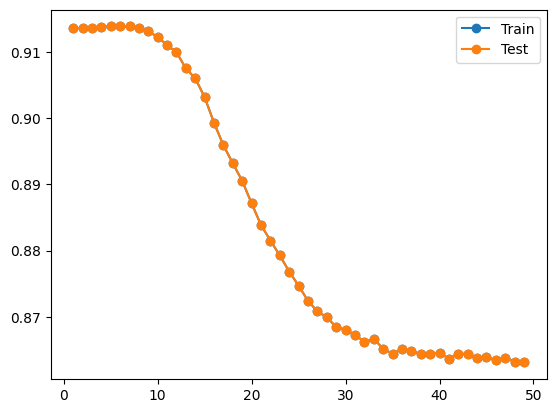

In [66]:
from matplotlib import pyplot as plt
plt.plot(max_depth, train_score, '-o', label = 'Train')
plt.plot(max_depth, test_score, '-o', label= 'Test')
plt.legend()

# Extra Tree Classifier

In [67]:
from sklearn.ensemble import ExtraTreesClassifier

In [68]:
extr = ExtraTreesClassifier()

In [69]:
extr.fit(x,y)

ExtraTreesClassifier()

In [70]:
extr.feature_importances_

array([0.34312106, 0.0127514 , 0.00755215, 0.02820038, 0.07875582,
       0.07627549, 0.02652049, 0.0154262 , 0.10500801, 0.03810415,
       0.02675343, 0.01667681, 0.05741588, 0.12608109, 0.01519759,
       0.01365048, 0.01250956])

In [71]:
feature_importance = extr.feature_importances_

In [72]:
imp = pd.DataFrame(feature_importance, columns=['Gain_Score'])

In [73]:
imp.head()

,Gain_Score
0,0.343121
1,0.012751
2,0.007552
3,0.028200
4,0.078756


In [74]:
x.columns

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [75]:
cols = pd.DataFrame(x.columns, columns=['Feature Name'])

In [76]:
cols.head()

,Feature Name
0,BMI
1,Smoking
2,AlcoholDrinking
3,Stroke
4,PhysicalHealth


In [77]:
gains = pd.concat([cols,imp],axis=1)

In [78]:
gains.head()

,Feature Name,Gain_Score
0,BMI,0.343121
1,Smoking,0.012751
2,AlcoholDrinking,0.007552
3,Stroke,0.028200
4,PhysicalHealth,0.078756


In [79]:
gains.nlargest(15,'Gain_Score')

,Feature Name,Gain_Score
0,BMI,0.343121
13,SleepTime,0.126081
8,AgeCategory,0.105008
4,PhysicalHealth,0.078756
5,MentalHealth,0.076275
12,GenHealth,0.057416
9,Race,0.038104
3,Stroke,0.028200
10,Diabetic,0.026753
6,DiffWalking,0.026520


<Axes: >

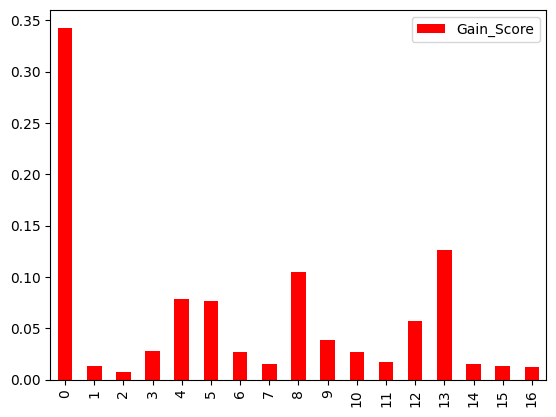

In [80]:
from matplotlib import pyplot as plt
gains.plot(kind='bar',color='red') #horizontal

<Axes: >

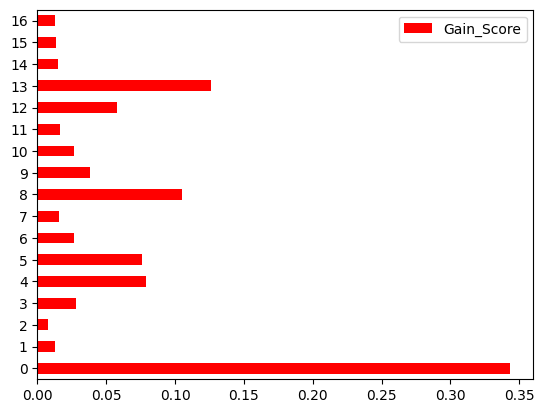

In [81]:
gains.plot(kind='barh',color='red') 

<Figure size 1000x600 with 0 Axes>

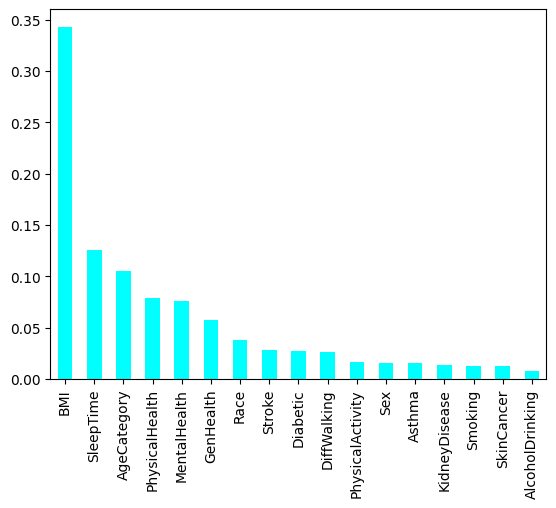

<Figure size 1000x600 with 0 Axes>

In [82]:
features = pd.Series(extr.feature_importances_, index=x.columns)
features.nlargest(20).plot(kind='bar', color='cyan')
plt.figure(figsize=(10,6))

In [83]:
!pip install nltk

In [84]:
from nltk.stem import PorterStemmer

In [85]:
port = PorterStemmer()

In [92]:
words = ['improve','improving','improvements','improved','improver']

In [93]:
words

['improve', 'improving', 'improvements', 'improved', 'improver']

In [97]:
from nltk.stem import WordNetLemmatizer

In [98]:
lem = WordNetLemmatizer()

In [100]:
for word in words:
    print('Before = ',word)
    print('After = ',port.stem(word))

Before =  improve
After =  improv
Before =  improving
After =  improv
Before =  improvements
After =  improv
Before =  improved
After =  improv
Before =  improver
After =  improv


In [146]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize

In [160]:
sentence  = "HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)"

In [162]:
sen = word_tokenize(text, language="english", preserve_line=True)

In [163]:
sen

['HeartDisease',
 ':',
 'Respondents',
 'that',
 'have',
 'ever',
 'reported',
 'having',
 'coronary',
 'heart',
 'disease',
 '(',
 'CHD',
 ')',
 'or',
 'myocardial',
 'infarction',
 '(',
 'MI',
 ')']

In [150]:
print(tokens)

['HeartDisease', ':', 'Respondents', 'that', 'have', 'ever', 'reported', 'having', 'coronary', 'heart', 'disease', '(', 'CHD', ')', 'or', 'myocardial', 'infarction', '(', 'MI', ')']


In [164]:
for word in sen:
    print(lem.lemmatize(word))

LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\USER/nltk_data'
    - 'C:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\USER\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\USER\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
